# Chapter 10 Neural Network with Keras

## Section 1: Perceptron

In [3]:
# import the libs
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# load the data
iris = load_iris()

# create the sample data instances
X = iris.data[:, (2, 3)]    # pedal length, petal width
y = (iris.target == 0).astype(np.int) # label: satosa: 1, not-satosa: 0

# create the Perceptron model
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# fit 
per_clf.fit(X, y)

# predict a new instance
y_pred = per_clf.predict([[2, 0.5]])

print(y_pred)




[1]


/tmp/ipykernel_107/2318198134.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # label: satosa: 1, not-satosa: 0


## Section 2: Implementing MLPs with TensorFlow Keras

### 2.1 check tensorflow

In [1]:
# import the libs
import tensorflow as tf
from tensorflow import keras


2021-09-11 12:41:59.242368: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-11 12:41:59.243243: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tf.__version__


'2.6.0'

In [3]:
keras.__version__

'2.6.0'

### 2.2 building an Image classifier using the sequential API

### using Keras to load the dataset

In [1]:
# import the lib
import tensorflow as tf
from tensorflow import keras

# load the dataset
fashion_mnist = keras.datasets.fashion_mnist

# split the dataset into training set and test set
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

2021-09-14 19:50:47.164336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-14 19:50:47.164467: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### create validation set

In [2]:
X_valid, X_train = X_train_full[: 5000] / 255.0, X_train_full[5000:] / 255.0

y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

### create label names

In [3]:
class_names = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
class_names[y_train[0]]

'Coat'

### create the model using the sequential API

In [5]:
# create sequential model
model = keras.models.Sequential()

# add the flatten layer to preprocess
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# add the 300-neuron hidden layer with ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))

# add the 100-neuron hidden layer with ReLu
model.add(keras.layers.Dense(100, activation="relu"))

# add the output layer with softmax
model.add(keras.layers.Dense(10, activation="softmax"))

2021-09-14 19:51:13.724520: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-14 19:51:13.725178: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-14 19:51:13.725462: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-8E5U3B3): /proc/driver/nvidia/version does not exist
2021-09-14 19:51:13.729034: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# show the model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


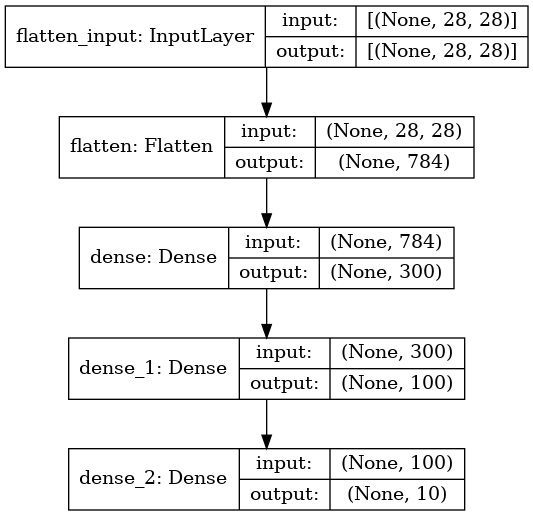

In [7]:
# show the image of the model
keras.utils.plot_model(model, show_shapes=True)

In [8]:
# show the layers data strucutre
model.layers

In [9]:
# index of the layers

for i in range (len(model.layers)):
    print (model.layers[i].name)

flatten
dense
dense_1
dense_2


In [10]:
# show the weights and biases of hidden layer number 1 ("dense" layer)

weights, biases = model.layers[1].get_weights()
print(weights)


[[-0.07204932 -0.06615792  0.0679342  ... -0.04854907  0.07265185
   0.05433644]
 [ 0.02576386  0.02234847  0.0057363  ... -0.07204002 -0.06593858
  -0.05068243]
 [-0.0603852   0.06885725  0.06545372 ...  0.04100048 -0.05414899
   0.04979403]
 ...
 [ 0.03748304 -0.04708242  0.0183041  ... -0.00442522  0.03698174
  -0.04066655]
 [ 0.05734703 -0.02975544  0.05592373 ... -0.02377617 -0.03244746
   0.06167027]
 [ 0.03807508  0.03841769  0.05780253 ...  0.02778498 -0.04034283
   0.03110434]]


### Compile the model

In [11]:
model.compile(loss="sparse_categorical_crossentropy", 
             optimizer="sgd", 
             metrics=["accuracy"])

### train and evaluate the model - History 

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

2021-09-14 19:51:47.740125: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7354 - accuracy: 0.7608 - val_loss: 0.4997 - val_accuracy: 0.8358
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4874 - accuracy: 0.8317 - val_loss: 0.4372 - val_accuracy: 0.8564
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4427 - accuracy: 0.8439 - val_loss: 0.4262 - val_accuracy: 0.8500
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4148 - accuracy: 0.8542 - val_loss: 0.4500 - val_accuracy: 0.8402
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3945 - accuracy: 0.8611 - val_loss: 0.3822 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3795 - accuracy: 0.8658 - val_loss: 0.3771 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3647 - accuracy: 0.8706 - val_loss: 0.3662 - val_accuracy:

In [13]:
# show the History class object's attribute - history
print("The history is: {}".format(history.history))


The history is: {'loss': [0.7353982329368591, 0.4873640239238739, 0.4426966905593872, 0.41479572653770447, 0.3945297598838806, 0.37945112586021423, 0.36468881368637085, 0.3532998859882355, 0.34236690402030945, 0.3334287405014038, 0.3247893154621124, 0.3172996938228607, 0.3102158010005951, 0.3025306761264801, 0.29691195487976074, 0.29016992449760437, 0.2852831184864044, 0.27999645471572876, 0.2738039195537567, 0.2696235477924347, 0.2648516595363617, 0.26080092787742615, 0.2557997703552246, 0.2513163387775421, 0.2470988929271698, 0.24269726872444153, 0.23938633501529694, 0.23572176694869995, 0.23219142854213715, 0.22787515819072723], 'accuracy': [0.7608181834220886, 0.8316545486450195, 0.843854546546936, 0.854163646697998, 0.8611272573471069, 0.865818202495575, 0.8706363439559937, 0.8751817941665649, 0.8777818083763123, 0.8802363872528076, 0.8846545219421387, 0.8859636187553406, 0.8883273005485535, 0.8913818001747131, 0.8934727311134338, 0.8954181671142578, 0.8967999815940857, 0.89892727

In [14]:
# show the History class object's attribute - params
print("The parameters is: {}".format(history.params))

The parameters is: {'verbose': 1, 'epochs': 30, 'steps': 1719}


In [15]:
# show the History class object's attribute - epoch
print("The epoch is: {}".format(history.epoch))

The epoch is: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


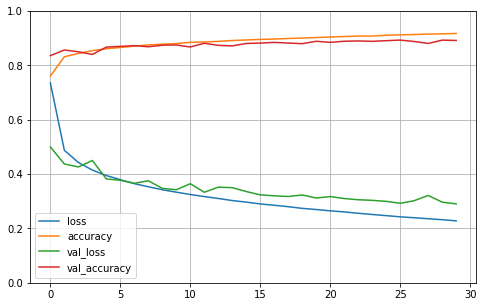

In [16]:
# show the History class object's plotting image

# import the lib 
from matplotlib import pyplot as plt
import pandas as pd

# plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Using the model to make predictions

In [19]:
# import the lib
import numpy as np

# create certain instances as new ones from the test set
X_new = X_test[: 3]

# obtain the probability prediction results
y_proba = model.predict(X_new)
print("The probability prediction results are: {}".format(y_proba.round(2)))

# obtain the class label prediction results
y_pred = np.argmax(y_proba, axis=1)
print("The class label prediction results are: {}".format(y_pred))

# obtain the class label names 
y_pred_label = np.array(class_names)[y_pred]
print("The class labels are: {}".format(y_pred_label))

The probability prediction results are: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
The class label prediction results are: [9 2 1]
The class labels are: ['Ankle boot' 'Pullover' 'Trouser']


### 2.3 Building a Regression MLP using the Sequential API

### load the dataset

In [28]:
# import the lib
from sklearn.datasets import fetch_california_housing

# load the dataset
housing = fetch_california_housing()

### split dataset into full training set with training set, validation set and test set

In [29]:
# import the lib
from sklearn.model_selection import train_test_split

# split the dataset into full training set and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

# split the full training set into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

### preprocess the training, validation and test data - scale

In [30]:
# import the lib
from sklearn.preprocessing import StandardScaler

# create the scaler class object
scaler = StandardScaler()

# fit the scaler with training set
scaler.fit(X_train)

# transform 
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

### Building a Regression MLP using Sequential API

In [31]:
# import the lib
from tensorflow import keras

# create the Sequential API
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# compile the model
model.compile(loss="mean_squared_error", optimizer="sgd")

# obtain the history of the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# evaluate the model with test set after being satisfied with the validation performance
mse_test = model.evaluate(X_test, y_test)



Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan 
Epoch 2/20
363/363 [==============================] - 0s 914us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 857us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 892us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 838us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 838us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 829us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 834us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 830us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 851us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [===================

### make predictions for new instances

In [27]:
# create certain new instances
X_new = X_test[: 3]

# make predictions 
y_pred = model.predict(X_new)

print(y_pred)

[[nan]
 [nan]
 [nan]]


### 2.4 Building Complex Models using the Functional API

### load the dataset

In [1]:
# import the lib
from sklearn.datasets import fetch_california_housing

# load the dataset
housing = fetch_california_housing()

### split the dataset into training set, test set and validation set

In [2]:
# import the lib
from sklearn.model_selection import train_test_split

# split the dataset into full training and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

# split the full training set into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

### preprocess the training, validation and test sets - scaling

In [3]:
# import the lib
from sklearn.preprocessing import StandardScaler

# create the scaler 
scaler = StandardScaler()

# fit
scaler.fit(X_train)

# transform
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

### build a model using the functional API

In [4]:
# import the lib
from tensorflow import keras
import tensorflow as tf
import numpy as np

# set the seed 
np.random.seed(42)
tf.random.set_seed(42)

# create all the layers of model

## input layer
input_layer = keras.layers.Input(shape=X_train_scaled.shape[1:])
## hidden layers
hidden_layer_1 = keras.layers.Dense(30, activation="relu")(input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation="relu")(hidden_layer_1)
## concatenate layer
concat = keras.layers.Concatenate()([input_layer, hidden_layer_2])
## output layer
output_layer = keras.layers.Dense(1)(concat)

# create the model
model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

# summarise
model.summary()


2021-10-06 10:34:25.914566: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-06 10:34:25.914709: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

2021-10-06 10:34:30.385561: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-06 10:34:30.385700: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-06 10:34:30.385801: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-8E5U3B3): /proc/driver/nvidia/version does not exist
2021-10-06 10:34:30.386825: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### compile the model

In [5]:
# compile the model with loss function and optimizer
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# create the history of the model validation
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

# evaluate the model with the test set
mes_test = model.evaluate(X_test_scaled, y_test)




2021-10-06 10:34:34.595054: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 950us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 897us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 900us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 928us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 938us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 929us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 942us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 933us/step - loss: 0.4659 - 

### predict the results of certain new instances

In [6]:
X_new = X_test[: 3]

y_pred = model.predict(X_new)

print(y_pred)

[[205.02869]
 [222.55455]
 [206.94267]]


### 2.4.2 what if we want to send a subset of the features through the wide path and a 
### different subset through the deep path

In [7]:
# import the libs
import numpy as np
import tensorflow as tf
from tensorflow import keras

# set the seed
np.random.seed(42)
tf.random.set_seed(42)

# create the layers 

## input layers
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

## hidden layers
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

## concatenate layers
concat = keras.layers.concatenate([input_A, hidden2])

## output layer
output = keras.layers.Dense(1, name="output")(concat)

# create the model
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

# compile the model
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


### split the scaled sets into set As and set Bs 

In [8]:
X_train_scaled_A, X_train_scaled_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_scaled_A, X_valid_scaled_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

### fit the model with the splited scaled sets

In [9]:
history = model.fit((X_train_scaled_A, X_train_scaled_B), y_train, epochs=20, 
                    validation_data=((X_valid_scaled_A, X_valid_scaled_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 978us/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 959us/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 994us/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 953us/step - loss: 0.4644 - val_loss

### evaluate the mse of data with test set

In [11]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 989us/step - loss: 31885.6719


### predict the new instances

In [12]:
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

y_pred = model.predict((X_new_A, X_new_B))

print(y_pred)

[[151.92181]
 [167.28365]
 [153.67645]]


### 2.4.3 multiple output models with functional API

In [13]:
output = keras.layers.Dense(1)(concat)

aux_output = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [14]:
# compile the multi-output model
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [15]:
# history
history = model.fit([X_train_scaled_A, X_train_scaled_B], [y_train, y_train], epochs=20, 
                   validation_data=([X_valid_scaled_A, X_valid_scaled_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7082 - dense_5_loss: 0.5954 - dense_6_loss: 1.7233 - val_loss: 1.6720 - val_dense_5_loss: 1.6486 - val_dense_6_loss: 1.8823
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5051 - dense_5_loss: 0.4519 - dense_6_loss: 0.9843 - val_loss: 7.4241 - val_dense_5_loss: 7.9438 - val_dense_6_loss: 2.7468
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5462 - dense_5_loss: 0.5123 - dense_6_loss: 0.8521 - val_loss: 0.4551 - val_dense_5_loss: 0.3918 - val_dense_6_loss: 1.0244
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4479 - dense_5_loss: 0.4154 - dense_6_loss: 0.7404 - val_loss: 0.5556 - val_dense_5_loss: 0.5335 - val_dense_6_loss: 0.7547
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4370 - dense_5_loss: 0.4112 - dense_6_loss: 0.6692 - val_loss: 0.4479 - val_dense_5_loss: 0.4065 - val_dense_6_loss: 0.8208


In [16]:
# evaluate the model
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 965us/step - loss: 28947.0234 - dense_5_loss: 24904.5020 - dense_6_loss: 65329.7305


### 2.5 Saving and Restoring a Model

In [17]:
# save the model
model.save("my_keras_model.h5")

# load the model
model = keras.models.load_model("my_keras_model.h5")

### 2.6 Using Callbacks

### 2.6.1 establishing a Sequential model

In [21]:
# import the lib
import numpy as np
from tensorflow import keras
import tensorflow as tf

# clean the session before creating a new model
keras.backend.clear_session()

# set the random seed
np.random.seed(42)
tf.random.set_seed(42)

# create a new model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

### 2.6.2 compile the model

In [22]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

### 2.6.3 train the model

In [25]:
history = model.fit(X_train_scaled, y_train, epochs=10, 
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 942us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 982us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 963us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 996us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4474 - val_loss

### 2.6.4 save the model

In [26]:
model.save("keras_model.h5")

### 2.6.5 load the model

In [27]:
model = keras.models.load_model("keras_model.h5")

### 2.6.6 callback

In [33]:
# obtain the checkpoints
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.h5", save_best_only=True)

# fit the model with callback 
history = model.fit(X_train_scaled, y_train, epochs=10, 
                   validation_data=(X_valid_scaled, y_valid), 
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3949 - val_loss: 0.3695
Epoch 2/10
363/363 [==============================] - 0s 945us/step - loss: 0.3923 - val_loss: 0.3684
Epoch 3/10
363/363 [==============================] - 0s 992us/step - loss: 0.3898 - val_loss: 0.3650
Epoch 4/10
363/363 [==============================] - 0s 967us/step - loss: 0.3873 - val_loss: 0.3632
Epoch 5/10
363/363 [==============================] - 0s 929us/step - loss: 0.3851 - val_loss: 0.3608
Epoch 6/10
363/363 [==============================] - 0s 894us/step - loss: 0.3829 - val_loss: 0.3585
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3808 - val_loss: 0.3564
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3788 - val_loss: 0.3561
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3768 - val_loss: 0.3552
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3749 - val_lo

### 2.6.7 save the callbacked model

In [34]:
model.save("keras_model_callbacked.h5")

In [35]:
model

### 2.6.8 early stopping callback 

In [32]:
# load the model that is not with callback
model = keras.models.load_model("keras_model.h5")

In [36]:
# callback with EarlyStopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
                                                 restore_best_weights=True)

# history
history = model.fit(X_train_scaled, y_train, epochs=100, 
                   validation_data=(X_valid_scaled, y_valid), 
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3731 - val_loss: 0.3531
Epoch 2/100
363/363 [==============================] - 0s 968us/step - loss: 0.3715 - val_loss: 0.3568
Epoch 3/100
363/363 [==============================] - 0s 977us/step - loss: 0.3700 - val_loss: 0.3501
Epoch 4/100
363/363 [==============================] - 0s 976us/step - loss: 0.3685 - val_loss: 0.3478
Epoch 5/100
363/363 [==============================] - 0s 980us/step - loss: 0.3671 - val_loss: 0.3518
Epoch 6/100
363/363 [==============================] - 0s 999us/step - loss: 0.3658 - val_loss: 0.3532
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3646 - val_loss: 0.3488
Epoch 8/100
363/363 [==============================] - 0s 986us/step - loss: 0.3635 - val_loss: 0.3481
Epoch 9/100
363/363 [==============================] - 0s 927us/step - loss: 0.3624 - val_loss: 0.3565
Epoch 10/100
363/363 [==============================] - 0s 950us/step - loss:

In [37]:
# evaluate the model
mse_test = model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3436


### 2.7 Visualisation Using TensorBoard

### root log directory

In [1]:
#import the lib
import os

# define the root log directory
root_logdir = os.path.join(os.curdir, "my_logs")

### subdirectory based on the current date and time

In [2]:
# import the lib
import time

# function
def get_run_logdir():
    
    run_id = time.strftime("run_%Y_%m_%d_%H_%M_%S")
    
    return os.path.join(root_logdir, run_id)

# create the run log directory
runlog_dir = get_run_logdir()

In [3]:
runlog_dir

'./my_logs/run_2021_10_09_12_58_40'

### load the data

In [4]:
# import the lib
from sklearn.datasets import fetch_california_housing

# load the dataset
housing = fetch_california_housing()

### obtain scaled training, test and validation set 

In [6]:
# import the lib
from sklearn.model_selection import train_test_split

# split the dataset into full training and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

# split the full training set into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# import the lib
from sklearn.preprocessing import StandardScaler

# create the scaler 
scaler = StandardScaler()

# fit
scaler.fit(X_train)

# transform
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

### create a new model

In [8]:
# import the lib
import numpy as np
import tensorflow as tf
from tensorflow import keras

# clear the session
keras.backend.clear_session()

# set the random seed
np.random.seed(42)
tf.random.set_seed(42)

# create a model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

# compile the model
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# tensorboard callback
tensorboard_cb = keras.callbacks.TensorBoard(runlog_dir)

# checkpoint callback
checkpoint_cb = keras.callbacks.ModelCheckpoint(runlog_dir, save_best_only=True)

history = model.fit(X_train_scaled, y_train, epochs=30, 
                   validation_data=(X_valid_scaled, y_valid), 
                   callbacks=[checkpoint_cb, tensorboard_cb])


2021-10-09 13:08:34.883642: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-09 13:08:34.883872: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-09 13:08:34.887629: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-09 13:08:36.558823: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
 76/363 [=====>........................] - ETA: 0s - loss: 4.5323

2021-10-09 13:08:37.092792: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-09 13:08:37.092965: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-09 13:08:37.098477: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-09 13:08:37.106863: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-09 13:08:37.128705: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs/run_2021_10_09_12_58_40/train/plugins/profile/2021_10_09_13_08_37

2021-10-09 13:08:37.138374: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2021_10_09_12_58_40/train/plugins/profile/2021_10_09_13_08_37/DESKTOP-8E5U3B3.trace.json.gz
2021-10-09 13:08:37.157174: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs/run_20

363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126


2021-10-09 13:08:37.870563: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./my_logs/run_2021_10_09_12_58_40/assets
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
INFO:tensorflow:Assets written to: ./my_logs/run_2021_10_09_12_58_40/assets
Epoch 3/30
363/363 [==============================] - 0s 975us/step - loss: 0.5934 - val_loss: 0.5803
INFO:tensorflow:Assets written to: ./my_logs/run_2021_10_09_12_58_40/assets
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5166
INFO:tensorflow:Assets written to: ./my_logs/run_2021_10_09_12_58_40/assets
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4895
INFO:tensorflow:Assets written to: ./my_logs/run_2021_10_09_12_58_40/assets
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4861
INFO:tensorflow:As

### start the TensorBoard Server

In [9]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

## Section 3 Fine-Tuning Neural Network Hyper-parameters

### load the data 

In [1]:
# import the lib
from sklearn.datasets import fetch_california_housing

# load the dataset
housing = fetch_california_housing()

### split the data into training, test and validation sets

In [2]:
# import the lib
from sklearn.model_selection import train_test_split

# split the dataset into full training and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

# split the full training set into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# import the lib
from sklearn.preprocessing import StandardScaler

# create the scaler 
scaler = StandardScaler()

# fit
scaler.fit(X_train)

# transform
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

### clear the session and set new random seed

In [3]:
# import the lib
import numpy as np
import tensorflow as tf
from tensorflow import keras

# clear the session
keras.backend.clear_session()

# set new random seed
np.random.seed(42)
tf.random.set_seed(42)

2021-10-11 10:50:10.025770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-11 10:50:10.026209: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### define a function for buidling a model

In [4]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
        
    model.add(keras.layers.Dense(1, activation="relu", **options))
    
    optimizer = keras.optimizers.SGD(learning_rate)
    
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

### create a KerasRegressor based on the function

In [5]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

### fit with callback and validation set

In [7]:
keras_reg.fit(X_train_scaled, y_train, 
             epochs=100, 
             validation_data=(X_valid_scaled, y_valid), 
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

2021-10-11 11:02:33.086642: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-11 11:02:33.087193: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-11 11:02:33.087374: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-8E5U3B3): /proc/driver/nvidia/version does not exist
2021-10-11 11:02:33.089495: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-11 11:02:34.172013: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLI

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0749 - val_loss: 0.5826
Epoch 2/100
363/363 [==============================] - 0s 901us/step - loss: 0.5664 - val_loss: 0.5011
Epoch 3/100
363/363 [==============================] - 0s 834us/step - loss: 0.5110 - val_loss: 0.4567
Epoch 4/100
363/363 [==============================] - 0s 907us/step - loss: 0.4762 - val_loss: 0.4359
Epoch 5/100
363/363 [==============================] - 0s 918us/step - loss: 0.4577 - val_loss: 0.4149
Epoch 6/100
363/363 [==============================] - 0s 836us/step - loss: 0.4433 - val_loss: 0.4056
Epoch 7/100
363/363 [==============================] - 0s 833us/step - loss: 0.4352 - val_loss: 0.3971
Epoch 8/100
363/363 [==============================] - 0s 835us/step - loss: 0.4281 - val_loss: 0.3928
Epoch 9/100
363/363 [==============================] - 0s 834us/step - loss: 0.4220 - val_loss: 0.3871
Epoch 10/100
363/363 [==============================] - 0s 834us/step - los

### obtain the test results

In [8]:
mse_test = keras_reg.score(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3299


### Tune the hyperparameter with RandomizedSearchCV

In [9]:
# import the lib
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# create the hyper-parameter distribution
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

# create RandomizedSearchCV object
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

# fit 
rnd_search_cv.fit(X_train_scaled, y_train, 
                 epochs=100, 
                 validation_data=(X_valid_scaled, y_valid), 
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 2.7925 - val_loss: 1.6142
Epoch 2/100
242/242 [==============================] - 0s 958us/step - loss: 1.2029 - val_loss: 0.8172
Epoch 3/100
242/242 [==============================] - 0s 913us/step - loss: 0.7515 - val_loss: 0.6104
Epoch 4/100
242/242 [==============================] - 0s 911us/step - loss: 0.6306 - val_loss: 0.5509
Epoch 5/100
242/242 [==============================] - 0s 920us/step - loss: 0.5915 - val_loss: 0.5282
Epoch 6/100
242/242 [==============================] - 0s 882us/step - loss: 0.5730 - val_loss: 0.5144
Epoch 7/100
242/242 [==============================] - 0s 887us/step - loss: 0.5600 - val_loss: 0.5034
Epoch 8/100
242/242 [==============================] - 0s 903us/step - loss: 0.5488 - val_loss: 0.4935
Epoch 9/100
242/242 [==============================] - 0s 998us/step - loss: 0.5390 - val_loss: 0.4851
Epoch 10/100
242/242 [==============================] - 0s 914us/step - los

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc0beabe2e0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc0ac00eb20>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

### show the selected model with the best hyper-parameters

In [10]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [11]:
rnd_search_cv.best_score_

-0.34079789121945697

In [12]:
selected_model = rnd_search_cv.best_estimator_.model 